# Principle Componenet Analysis: MNIST

Notebook / exercise from Philipp Eller.

**Useful functions**

- `np.eigh`
- 

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from scipy import stats
import scipy
%matplotlib inline

In [5]:
plt.rcParams['figure.figsize'] = [5., 5.]
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14 
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['legend.fontsize'] = 14

Let's explore the MNSIT dataset and use PCA to reduce its dimensionality.

In [6]:
def plot(X, y=None, rand=True):
    '''
    Plot 25 examples from X
    - X: shape N,784
    - y: (optional) for labelling the subplots with the truth labels
    - rand: (default True), randomly draw samples from X
    '''
    fig, ax = plt.subplots(5,5)
    
    if rand:
        idx = np.random.choice(len(X), 25, replace=False)
    else:
        idx = np.arange(25)
    
    for i in range(25):
        axis = ax[i//5, i%5]
        axis.axis('off')
        axis.imshow(X[idx[i]].reshape(28,28), cmap='gray_r')
        if y is not None:
            axis.set_title('y = %s'%y[idx[i]])

**Open the dataset**

In [7]:
X = np.load('mnist.npz')['x_train']
y = np.load('mnist.npz')['y_train']

print('X',X.shape)
print('y',y.shape)

X (60000, 28, 28)
y (60000,)


What does the data look like?

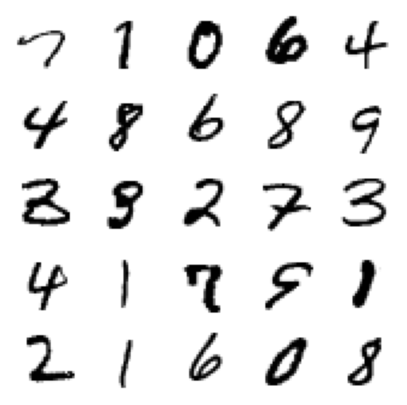

In [8]:
plot(X)

**Need to center the features before defining the sample covaraince matrix**

**Step 1:** Preprocessing
- "Flatten" X to have (shape N, 768)
- Subtract off the mean

In [87]:
N,d1,d2 = X.shape
d = d1*d2

'''
Your code here
'''

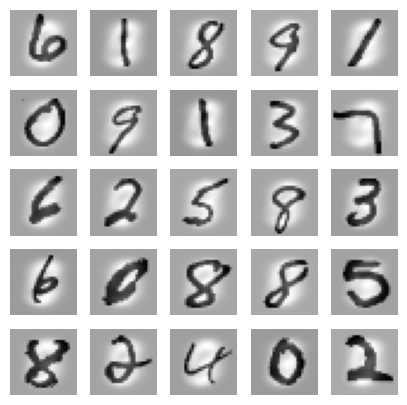

In [25]:
# What does the input look like now?
plot(X)

**Step 2:** Calculate the sample covariance matrix

In [26]:
'''
To do: Your code here
'''
Q = 

**Step 3:** Do the eigenvalue decomposition

**Hints:**
- `scipy.linalg.eigh` is helpful
- What's the order that the eigenvalues / vectors get returned in? Which evals/evecs are most important for the pca alg?

In [88]:
'''

'''

Sanity check: Can we reconstruct the sample covariance matrix from the eigenvectors?

Text(0.5, 1.0, 'Reco from eigenvectors')

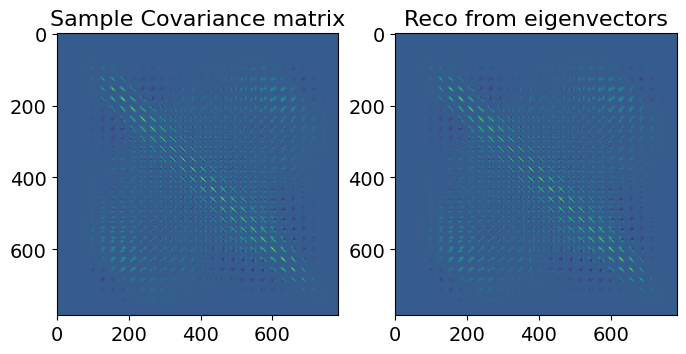

In [91]:
fig, (ax0,ax1) = plt.subplots(1,2,figsize=(8,4))

'''
Note, assuming Q is the sample covariance matrix, and
Qreco is reconstructed from the eigenvalues / vectors
'''

ax0.imshow(Q)
ax0.set_title('Sample Covariance matrix')

ax1.imshow(Qreco)
ax1.set_title('Reco from eigenvectors')

**Recall: What were we trying to maximimze?** -> The expected variance: 
$$Var(k) = \sum_k \frac{1}{N}||X v_k||_2^2,$$

or the L2 norm squared in the lower dimensional representation.

**Step 4:** Plot the expcted variance as a function of the dimensionality of the lower dim represnetation, $k$.

In [92]:
'''
To do: your code here
'''

3428445.433070617

In [95]:
# Tip: Sanity check that the variance of all the eigenvectors matches
# the variance w/o the change of basis

(3428445.4330706247, 3428445.433070617)

Text(0.5, 0, 'PCA component')

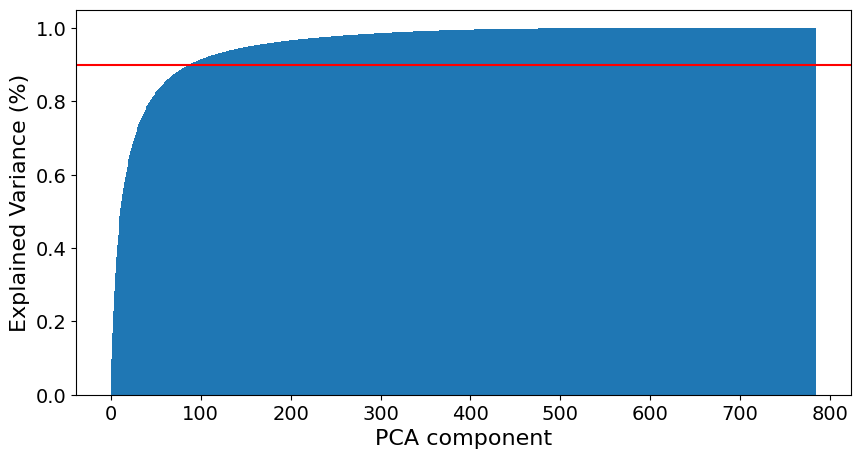

In [98]:
'''
Chcek your code!

Assuming explained_variance_ratio is calculated in the step above,
but you can use whatever variable name you like
'''

fig, ax = plt.subplots(1, 1, figsize=(10,5))
ax.bar(np.arange(k) + 1, explained_variance_ratio, width=1, label='cumulative')

ax.set_ylabel('Explained Variance (%)')
ax.set_xlabel('PCA component')

**Follow up Q:** How many modes do you need to explain the expected variance?

**Includ your A in text:**

In [99]:
# Check your intuition in code

k = # Your task, what k to check
print(k, explained_variance_ratio[k])

10 0.5092416997000105
100 0.9156125897319808
320 0.9888798296634822


**Step 5:** How do the number of reco modes impact the reconstructed resolution (A.k.a, look at the plots for a low, med and high reconstruction value.)

k= 10


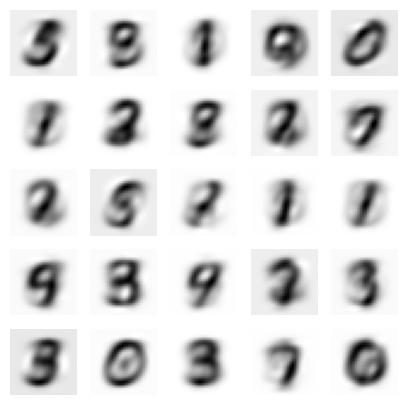

k= 100


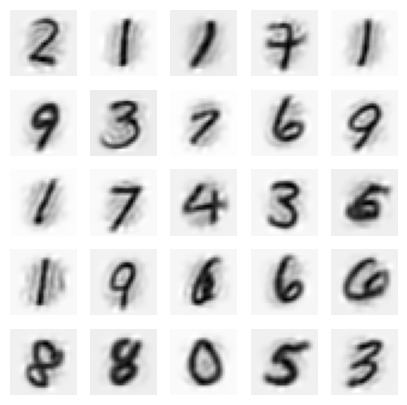

k= 320


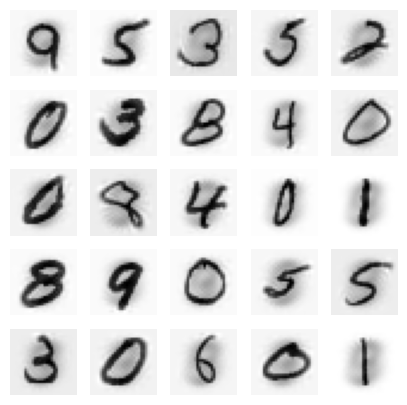

In [104]:
for k in [10, 100,320]:

    # for speed, I'm just going to look at 25 examples
    idx =  np.random.choice(N, 25, replace=False)
    
    # TO DO: Project into the lower dim repn, then back into the higher dim one
    X_rec =

    # TO DO:  Add the mean back on
    X_rec += 

    print('k=',k)
    plot(X_rec + mean,rand=False)
    plt.show()

**Step 6:** Visualize the 2d PCA space 

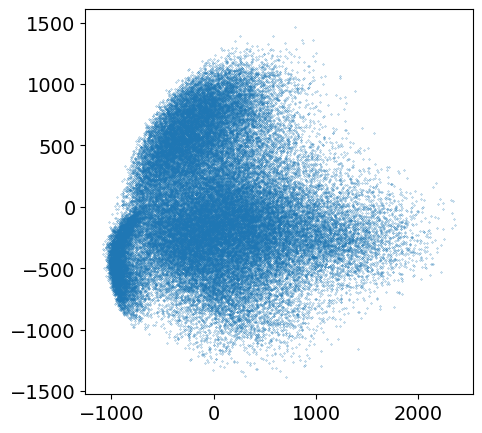

In [118]:
reduced_data = 

_ = plt.scatter(reduced_data[:, 0], reduced_data[:, 1],s=.05)

Nice! Does this latent representation correspond to something meaningful for recognizing digits too?

**Step 7:** Color code the PCA vizualization based on the "truth" y values

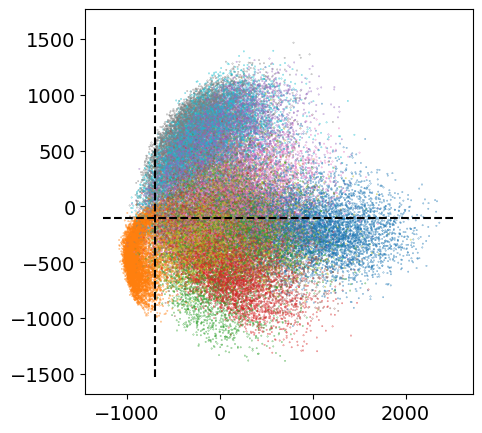

In [131]:
plt.scatter(reduced_data[:, 0], reduced_data[:, 1],s=.05,c=plt.get_cmap('tab10')(y))

plt.vlines(-700,*plt.ylim(),color='k',ls='--')
plt.hlines(-100,*plt.xlim(),color='k',ls='--')

What are these "clusters" of points?

In [132]:
mask = (reduced_data[:, 0] < -700) & (reduced_data[:, 1] < -100)

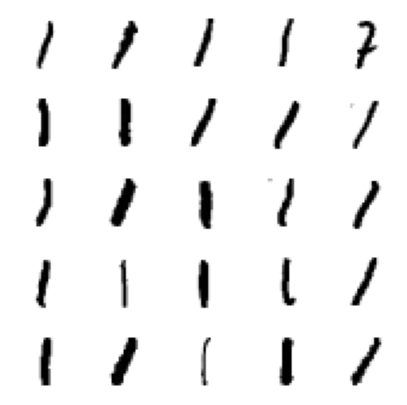

In [133]:
plot((X+mean)[mask])

Cool, the lower left corner mostly corresponding to _______